Dengue AI Project
---
Philippines: Region 1

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

Import dataset.
---
*   Independent variables = Humidity, Rainfall, Temperature.
*   Dependent variable = Dengue count

In [2]:
Philippines = pd.read_csv('dengue_climate.csv')
Region = Philippines['Region']
Year = Philippines['Year']
Month = Philippines['Month']
climate = ['Humidity', 'Rainfall', 'Temperature']


Log transformation
---



In [3]:
Humidity = np.log(Philippines.Humidity +1)
Rainfall = np.log(Philippines.Rainfall +1)
Temperature = np.log(Philippines.Temperature +1)
Dengue_Count = np.log(Philippines.Dengue_Count +1)

In [4]:
Humidity = pd.DataFrame(Humidity, columns=['Humidity'])
Rainfall = pd.DataFrame(Rainfall, columns=['Rainfall'])
Temperature = pd.DataFrame(Temperature, columns=['Temperature'])
Dengue_Count = pd.DataFrame(Dengue_Count, columns=['Dengue_Count'])
Philippines = Humidity.join(Rainfall.join(Temperature.join(Dengue_Count)))
Philippines = pd.concat([Region, Year, Month, Philippines], axis=1)

Create training and test set
---
* Training set = Year 2013 to 2017
* Test set = Year 2018


In [5]:
R1_trainset = Philippines[(Philippines['Year'] < 2018) & (Philippines['Region'] == 'Region01')]
R1_train_climate = R1_trainset.loc[:, climate].values
R1_train_dengue = R1_trainset.iloc[:, -1].values
R1_testset = Philippines[(Philippines['Year'] == 2018) & (Philippines['Region'] == 'Region01')]
R1_test_climate = R1_testset.loc[:, climate].values
R1_test_dengue = R1_testset.iloc[:, -1].values

Create artificial neural network.
---


In [6]:
R1ann = tf.keras.models.Sequential()
R1ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
R1ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
R1ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
R1ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
R1ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
R1ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
R1ann.add(tf.keras.layers.Dense(units=1))
R1ann.compile(optimizer = 'adam', loss = 'mean_squared_logarithmic_error')
R1ann.fit(R1_train_climate, R1_train_dengue, batch_size = 48, epochs = 500)

Train on 60 samples
Epoch 1/500
60/60 [==============================] - 1s 15ms/sample - loss: 3.9054
Epoch 2/500
60/60 [==============================] - 0s 85us/sample - loss: 3.8705
Epoch 3/500
60/60 [==============================] - 0s 71us/sample - loss: 3.8364
Epoch 4/500
60/60 [==============================] - 0s 78us/sample - loss: 3.8009
Epoch 5/500
60/60 [==============================] - 0s 82us/sample - loss: 3.7642
Epoch 6/500
60/60 [==============================] - 0s 81us/sample - loss: 3.7259
Epoch 7/500
60/60 [==============================] - 0s 82us/sample - loss: 3.6880
Epoch 8/500
60/60 [==============================] - 0s 79us/sample - loss: 3.6503
Epoch 9/500
60/60 [==============================] - 0s 133us/sample - loss: 3.6134
Epoch 10/500
60/60 [==============================] - 0s 124us/sample - loss: 3.5759
Epoch 11/500
60/60 [==============================] - 0s 128us/sample - loss: 3.5376
Epoch 12/500
60/60 [==============================] - 0s 123us

Predict dengue using the test set
---

In [7]:
predict_R1_dengue = R1ann.predict(R1_test_climate)


Get the Mean Squared Logarithmic Error
---



In [8]:
msle = tf.keras.losses.MeanSquaredLogarithmicError()
R1_msle = msle(R1_test_dengue, predict_R1_dengue).numpy()

Compare the predicted from the actual values of dengue incidence
---

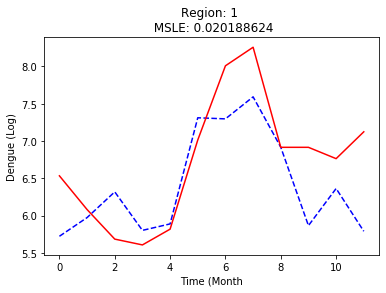

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
ax.set_title('Region: 1 \n MSLE: '+str(R1_msle))
ax.set_ylabel('Dengue (Log)')
ax.set_xlabel('Time (Month')
plt.plot(predict_R1_dengue, 'b--')
plt.plot(R1_test_dengue, 'r-')
plt.show()

In [12]:
predict = pd.DataFrame(predict_R1_dengue)
actual = pd.DataFrame(R1_test_dengue)
R1_eval = pd.concat([predict, actual], axis=1)
R1_eval.columns = ['Predict', 'Actual']
R1_eval.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
R1_eval.to_csv('R1_eval.csv')